# Data Source: Generic

In [61]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [62]:
data_source = 'WBG'

In [63]:
df = pd.read_csv(f"Data_Sources/{data_source}.csv").convert_dtypes()

### Rows and columns in the dataset

In [64]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")
number_of_columns = columns

Rows: 58725, Columns: 19


In [65]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
# df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

### Sample data and features

In [66]:
df.tail().T

,58720,58721,58722,58723,58724
iso3,ZWE,ZWE,ZWE,ZWE,ZWE
region_code,SSA,SSA,SSA,SSA,SSA
pop,16340822.0,16340822.0,16340822.0,16340822.0,16340822.0
WBG_category_change,<NA>,<NA>,<NA>,<NA>,<NA>
WBG_CPI,<NA>,<NA>,<NA>,<NA>,<NA>
WBG_evacuation,<NA>,<NA>,<NA>,<NA>,<NA>
WBG_GDP_PPP,<NA>,<NA>,<NA>,<NA>,<NA>
WBG_income_level,2,2,2,2,2
WBG_income_level_months_stale,10,11,12,13,14
WBG_lend_cat_civil_works,<NA>,<NA>,<NA>,<NA>,<NA>


### Data structure, data types, and non-null counts

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58725 entries, 0 to 58724
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   iso3                           58725 non-null  string 
 1   region_code                    58725 non-null  string 
 2   pop                            58713 non-null  Float64
 3   WBG_category_change            58050 non-null  Int64  
 4   WBG_CPI                        32040 non-null  Float64
 5   WBG_evacuation                 57645 non-null  Int64  
 6   WBG_GDP_PPP                    35328 non-null  Float64
 7   WBG_income_level               54711 non-null  Int64  
 8   WBG_income_level_months_stale  54711 non-null  Int64  
 9   WBG_lend_cat_civil_works       58050 non-null  Int64  
 10  WBG_lend_cat_ibrd              58050 non-null  Int64  
 11  WBG_lend_cat_ibrd_grad         58050 non-null  Int64  
 12  WBG_lend_cat_ida               58050 non-null 

### Descriptive statistics of categorical columns

In [68]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
WBG_category_change,58050.0,0.001757,0.067159,-2.0,0.0,0.0,0.0,2.0
WBG_CPI,32040.0,185.109692,1260.511373,1.456994,78.993744,103.215295,126.321014,47954.241906
WBG_evacuation,57645.0,0.000347,0.018624,0.0,0.0,0.0,0.0,1.0
WBG_GDP_PPP,35328.0,7450.642698,6206.977198,420.272177,2517.930083,5429.577704,10979.494547,37445.160045
WBG_income_level,54711.0,1.88644,0.77026,1.0,1.0,2.0,2.0,4.0
WBG_income_level_months_stale,54711.0,11.490377,3.556358,6.0,8.0,11.0,14.0,62.0
WBG_lend_cat_civil_works,58050.0,0.117829,0.322409,0.0,0.0,0.0,0.0,1.0
WBG_lend_cat_ibrd,58050.0,0.26994,0.443932,0.0,0.0,0.0,1.0,1.0
WBG_lend_cat_ibrd_grad,58050.0,0.066322,0.248846,0.0,0.0,0.0,0.0,1.0


### Deatils of missing values in the features

In [70]:
# Step 1: Create missing summary
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percent
}).sort_values(by='Missing Percentage (%)', ascending=False)

# Step 2: Drop columns with >70% overall missing AND >20% missing in last 5 years of the data
for col in missing_df.index:
    if missing_percent[col] > 70:
        if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
            max_date = df['date'].max()
            five_years_ago = max_date - pd.DateOffset(years=5)
            recent_df = df[df['date'] >= five_years_ago]
            recent_missing = recent_df[col].isnull().sum()
            recent_total = recent_df[col].shape[0]
            if recent_total == 0 or (recent_missing / recent_total * 100) > 20:
                df = df.drop(columns=[col])
        else:
            df = df.drop(columns=[col])  # Drop if no date context


In [71]:
number_of_features = len(df.columns)
print(f"Number of features before filtering: {number_of_features}")

Number of features before filtering: 19


In [72]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

In [73]:
numeric_df = df.select_dtypes(include=['number']).dropna()
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)
numeric_df = numeric_df.dropna(axis=1, how='all')  # Drop all-NaN columns
numeric_df = numeric_df.dropna(axis=0, how='any')  # Drop rows with any NaN

### Availability of data by country

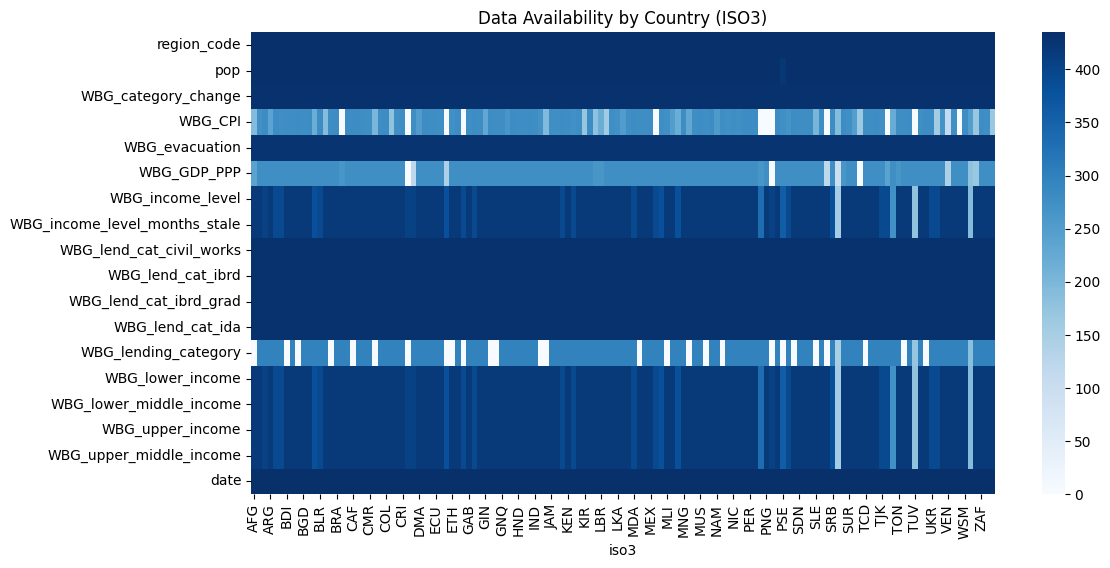

In [74]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

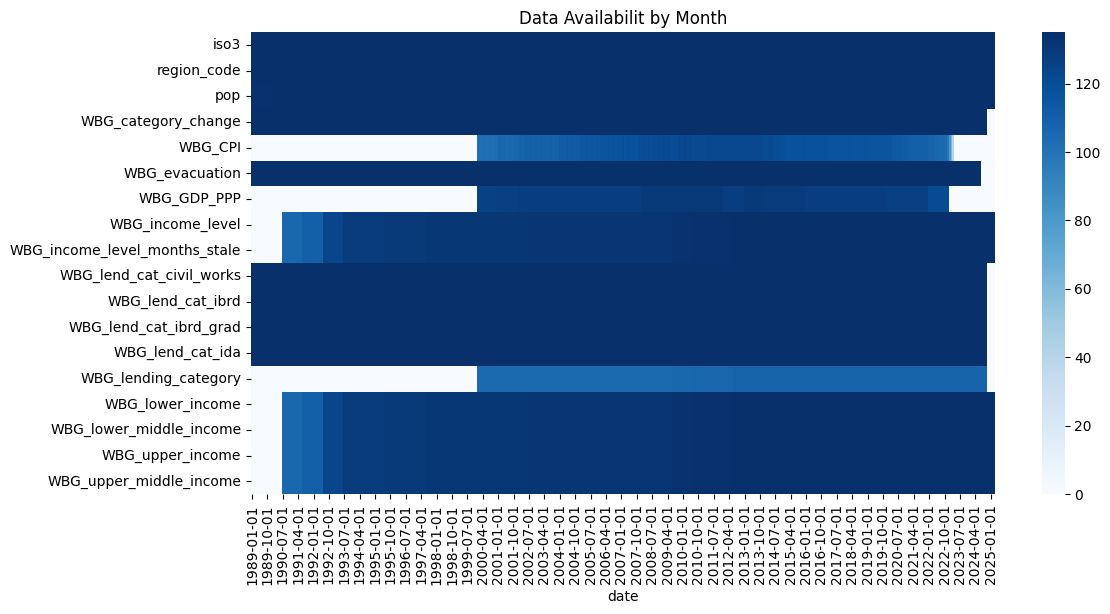

In [75]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

### Correlation between the features

In [76]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

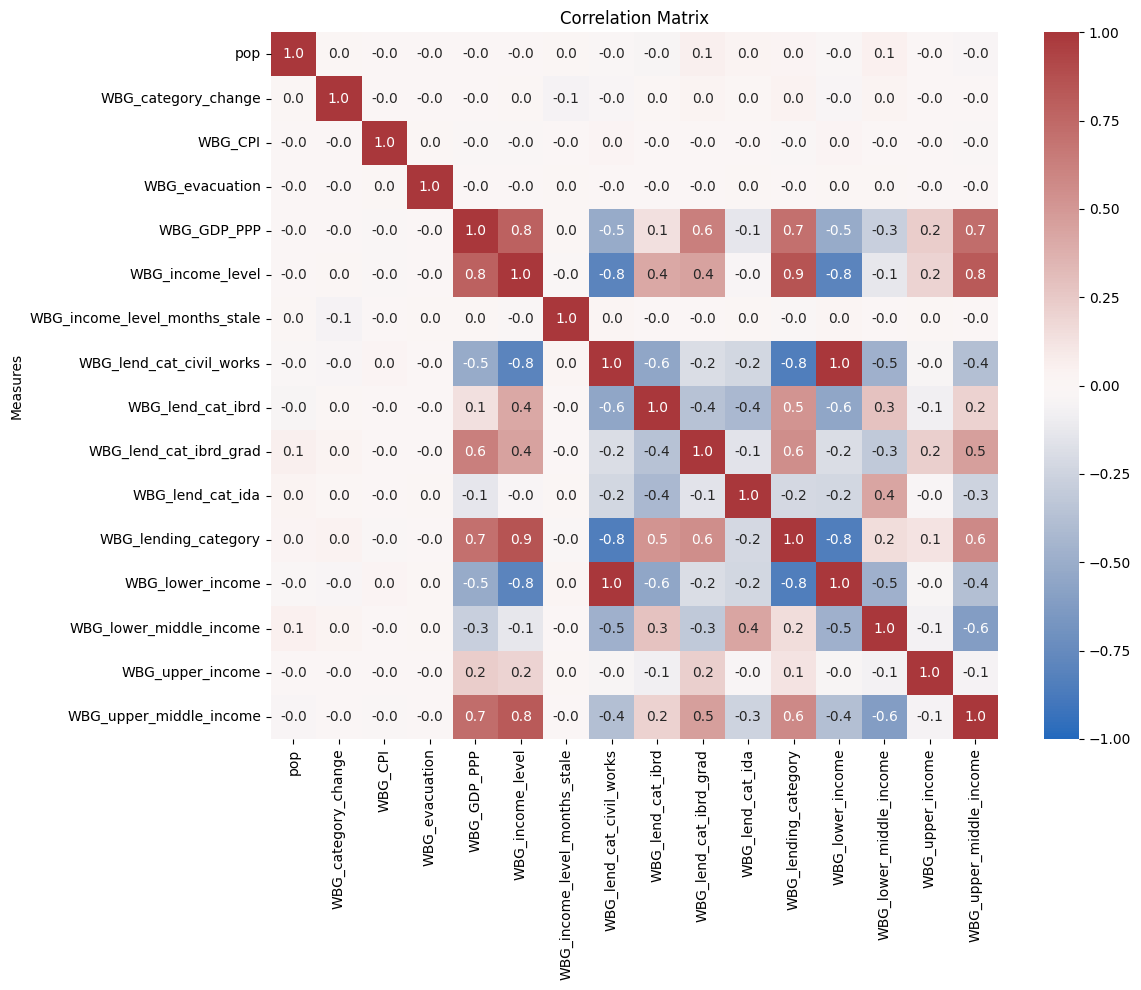

In [77]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Principal Components Analysis of the features

In [78]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(numeric_df)
# # pca = PCA(n_components=0.75)
# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X_scaled)
# n_components = X_pca.shape[1]
# print(f"Number of components retained: {n_components}")
# columns = [f'PC{i+1}' for i in range(n_components)]
# print(f"Column names for PCA components: {columns}")

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Fit PCA with all components
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Find number of components with explained variance >= 0.05
explained_variances = pca_full.explained_variance_ratio_
selected_components = [
    i for i, var in enumerate(explained_variances) if var >= 0.05
]

# Limit number of components to at most 10
n_components = min(len(selected_components), 10)

# Apply PCA again with chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Get component names
columns = [f'PC{i+1}' for i in range(n_components)]

# Output
print(f"Number of components retained: {n_components}")
print(f"Column names for PCA components: {columns}")
number_of_principal_components = n_components
print(f"Number of principal components: {number_of_principal_components}")

Number of components retained: 9
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
Number of principal components: 9


In [80]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [81]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

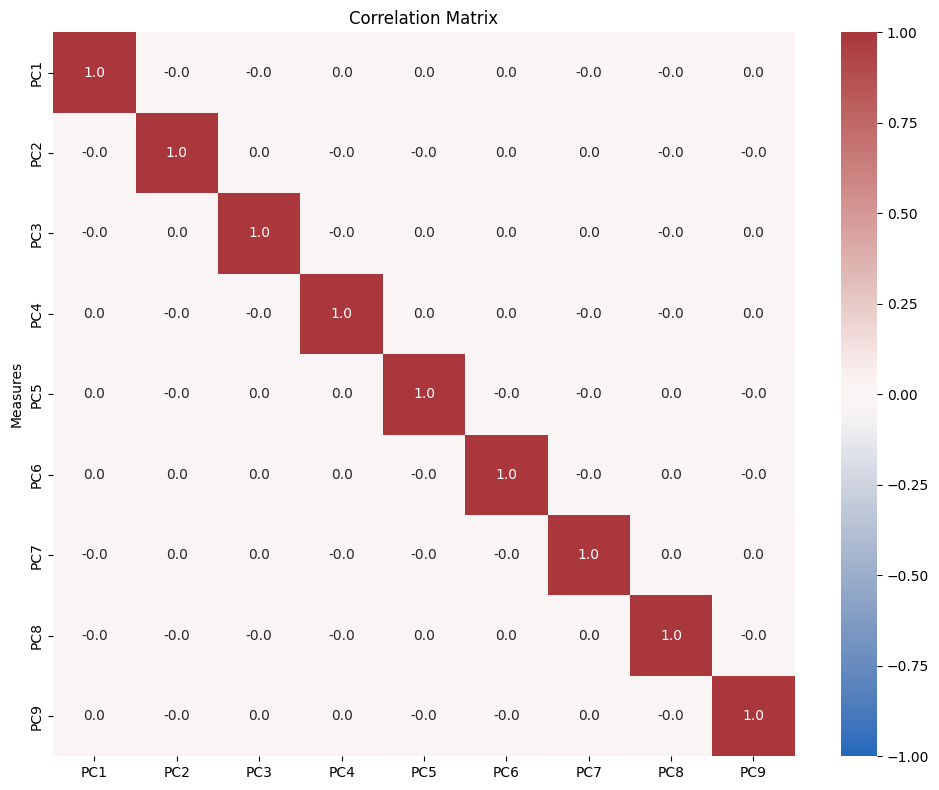

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

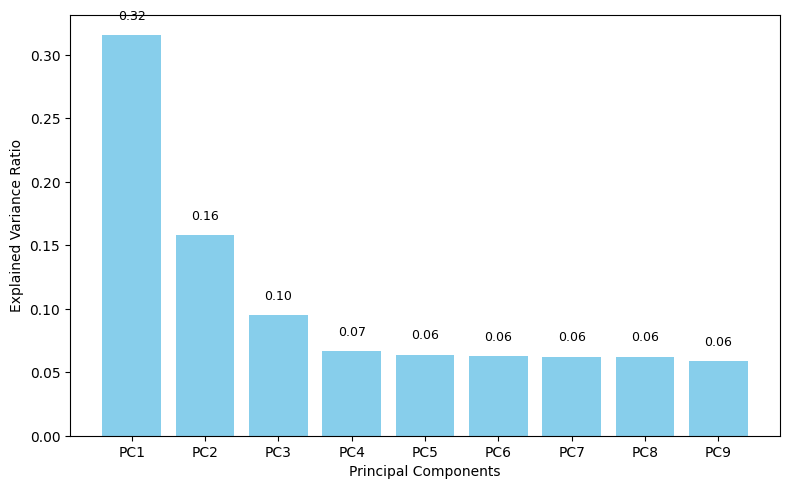

In [83]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 8: 0.8861


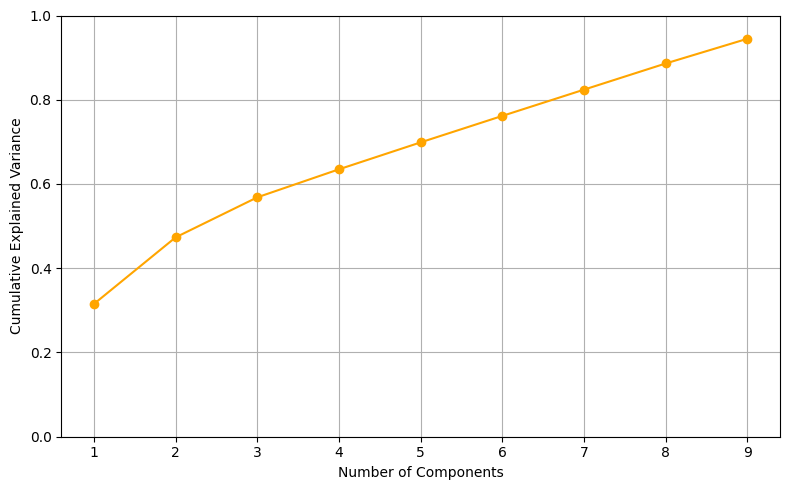

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 8 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [85]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

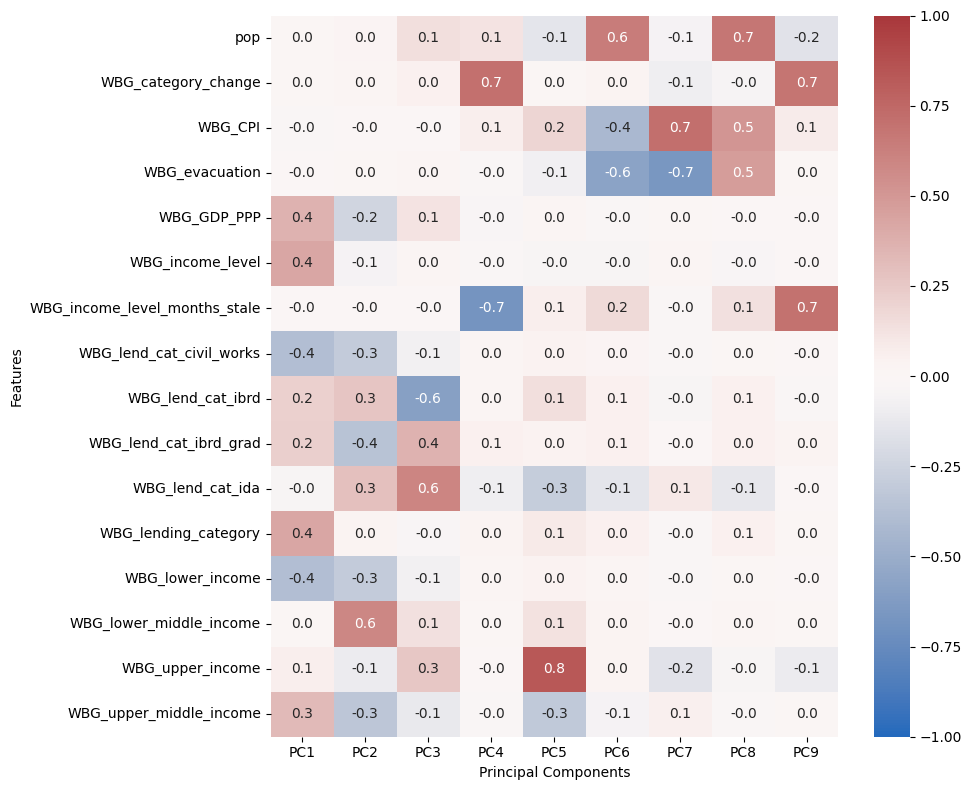

In [86]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [87]:
import pandas as pd

# Ensure full display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Move index (indicators) to the first column
loadings_df_reset = loadings_df.reset_index()

# Round and print the DataFrame
print(loadings_df_reset.round(2))

# Reset options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Save to CSV (with indicators as first column)
loadings_df_reset.to_csv(f'PC_loadings/{data_source}_loadings.csv', index=False)


                            index   PC1   PC2   PC3   PC4   PC5   PC6   PC7  \
0                             pop  0.00  0.02  0.15  0.12 -0.14  0.65 -0.06   
1             WBG_category_change  0.01  0.02  0.05  0.71  0.01  0.04 -0.09   
2                         WBG_CPI -0.02 -0.01 -0.01  0.07  0.19 -0.42  0.71   
3                  WBG_evacuation -0.00  0.01  0.02 -0.02 -0.08 -0.58 -0.66   
4                     WBG_GDP_PPP  0.36 -0.24  0.12 -0.04  0.02 -0.02  0.01   
5                WBG_income_level  0.43 -0.06  0.02 -0.03 -0.04 -0.04  0.02   
6   WBG_income_level_months_stale -0.01 -0.00 -0.01 -0.68  0.07  0.17 -0.03   
7        WBG_lend_cat_civil_works -0.39 -0.30 -0.07  0.02  0.04  0.02 -0.02   
8               WBG_lend_cat_ibrd  0.22  0.27 -0.59  0.02  0.15  0.05 -0.05   
9          WBG_lend_cat_ibrd_grad  0.22 -0.35  0.36  0.05  0.04  0.05 -0.01   
10               WBG_lend_cat_ida -0.05  0.29  0.60 -0.09 -0.29 -0.15  0.10   
11           WBG_lending_category  0.43  0.04 -0.04 

In [88]:
pca_df.columns = [f'{data_source}_{col}' for col in pca_df.columns]
pca_df.columns

Index(['WBG_PC1', 'WBG_PC2', 'WBG_PC3', 'WBG_PC4', 'WBG_PC5', 'WBG_PC6',
       'WBG_PC7', 'WBG_PC8', 'WBG_PC9'],
      dtype='object')

In [89]:
pca_df 

,WBG_PC1,WBG_PC2,WBG_PC3,WBG_PC4,WBG_PC5,WBG_PC6,WBG_PC7,WBG_PC8,WBG_PC9
567,-3.540119,-1.425434,-0.220461,-0.064774,0.070474,0.047632,-0.167523,-0.191584,0.105287
568,-3.542897,-1.426235,-0.222088,-0.261703,0.089777,0.095727,-0.176414,-0.151369,0.307098
569,-3.545675,-1.427037,-0.223716,-0.458629,0.109090,0.143801,-0.185270,-0.111130,0.508913
570,-3.548452,-1.427838,-0.225342,-0.655558,0.128394,0.191892,-0.194155,-0.070912,0.710725
571,-3.551236,-1.428644,-0.226973,-0.852458,0.147777,0.239808,-0.202746,-0.030481,0.912569
...,...,...,...,...,...,...,...,...,...
58693,-0.030514,1.632516,-0.963927,1.885017,3.036074,-5.844575,9.551892,6.758119,0.147790
58694,-0.038751,1.628359,-0.968930,1.711917,3.120485,-5.942023,9.788412,6.974944,0.376895
58695,-0.048631,1.623194,-0.974947,1.545984,3.224477,-6.083244,10.098740,7.244885,0.614208
58696,-0.054537,1.620470,-0.978508,1.362709,3.281088,-6.118548,10.230474,7.386301,0.831658


In [90]:
final_pca_df = pd.concat([df[['date', 'iso3']], pca_df], axis=1).reset_index(drop=True)
final_pca_df

,date,iso3,WBG_PC1,WBG_PC2,WBG_PC3,WBG_PC4,WBG_PC5,WBG_PC6,WBG_PC7,WBG_PC8,WBG_PC9
0,1989-01-01,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1989-02-01,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989-03-01,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989-04-01,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-05-01,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
58720,2024-11-01,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58721,2024-12-01,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58722,2025-01-01,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58723,2025-02-01,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
final_pca_df.shape

(58725, 11)

In [92]:
# save the PCA results to a CSV file
# if columns number is more than 3, then save it to PC_Data folder
import os
if not os.path.exists('PC_Data'):
    os.makedirs('PC_Data')  
if len(final_pca_df.columns) > 3:
    print(f"Saving PCA results to PC_Data/{data_source}_PC.csv")
    final_pca_df.to_csv(f'PC_Data/{data_source}_PC.csv', index=False)
    print(f"Saved PCA results to PC_Data/{data_source}_PC.csv")
    print(f"\nNumber of columns: {number_of_columns}")
    print(f"Number of features before filtering: {number_of_features}")
    print(f"Number of principal components: {number_of_principal_components}")
    print(f"Total explained variance: {total_explained_variance * 100:.2f}%")
else:
    print("Not enough PCA components to save, skipping CSV export.")

Saving PCA results to PC_Data/WBG_PC.csv
Saved PCA results to PC_Data/WBG_PC.csv

Number of columns: 19
Number of features before filtering: 19
Number of principal components: 9


NameError: name 'total_explained_variance' is not defined